In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from pprint import pprint

# Download data from yahoo finance

In [66]:
symbol = "BTC-USD"
symbol = "AAPL"
symbol = "XRP-USD"
df = yf.download(symbol, start="2018-09-15", end="2022-08-15", progress=False)

# Cluster points into segments with similar trend

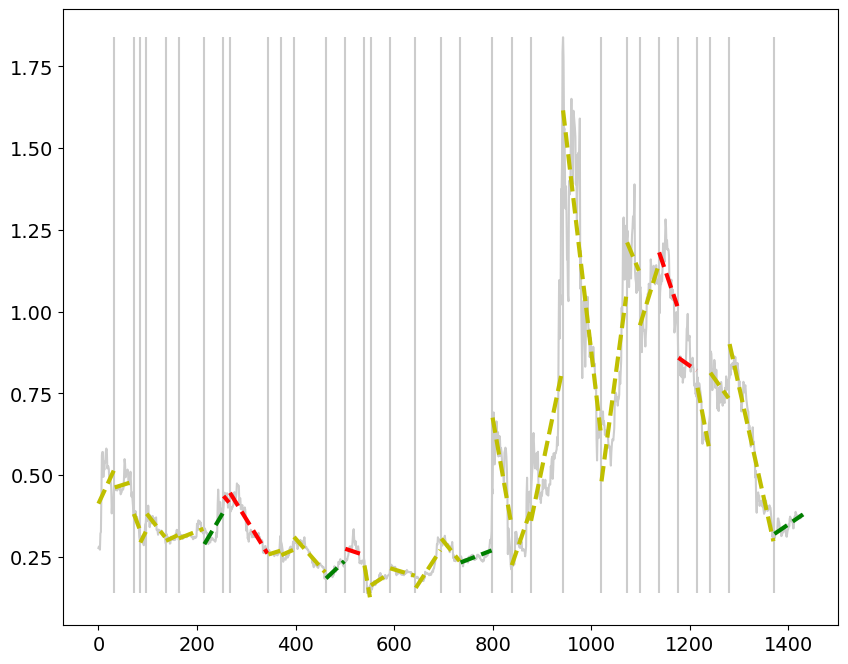

In [76]:
column = "Adj Close"

x = list(range(0, len(df.index.tolist()), 1))
y = df[column].tolist()
ymin, ymax  = (np.min(y), np.max(y),)

plt.subplots(figsize=(10, 8))
plt.plot(x, df[column], "#CCC")

N = 40
off = int(N / 3)
alpha = 2
beta = 2

prev_fit = None

segments = []
s_start = 0
slopes = []
for start in range(0, len(df) - N, off):
    fit = np.polyfit(x[start : start + N], y[start : start + N], 1)
    slopes.append(fit[0])
    if prev_fit is not None:
        r0 = abs((prev_fit[0] - fit[0]) / (fit[0]))
        r1 = abs((prev_fit[1] - fit[1]) / (fit[1]))

        if r0 >= alpha or r1 >= beta:
            s_stop = start + off / 2
            plt.vlines(s_stop, ymin, ymax, "#CCC")
            segments.append((int(s_start),int(s_stop),slopes,))
            s_start = s_stop + 1
            slopes=[]

    fit_fn = np.poly1d(fit)
#     plt.plot(x[start : start + N], fit_fn(x[start : start + N]), "--y")
    prev_fit = fit
segments.append(
    (
        int(s_start),
        int(len(df)),
        slopes,
    )
)

# Calculate trend for the segment
for start, stop, slopes in segments:
    xx = x[start:stop]
    yy = y[start:stop]
    fit = np.polyfit(xx, yy, 1)
    fit_fn = np.poly1d(fit)
    
    all_positive_slopes = all([v>=0 for v in slopes])
    all_negatives_slopes = all([v<0 for v in slopes])
    
    if fit[0] >= 0 and all_positive_slopes:
        col = "g"
    elif fit[0] < 0 and all_negatives_slopes:
        col = "r"
    else:
        col = 'y'
    plt.plot(x[start:stop], fit_fn(x[start:stop]), f"--{col}", linewidth=3)
plt.show()

# Detrend segments

std: 0.092, rng: 609.000
std: 0.029, rng: 317.000
std: 0.015, rng: 132.000
std: 0.019, rng: 181.000
std: 0.012, rng: 172.000
std: 0.009, rng: 112.000
std: 0.013, rng: 159.000
std: 0.034, rng: 429.000
std: 0.014, rng: 114.000
std: 0.027, rng: 345.000
std: 0.012, rng: 213.000
std: 0.017, rng: 235.000
std: 0.013, rng: 239.000
std: 0.009, rng: 155.000
std: 0.027, rng: 403.000
std: 0.016, rng: 340.000
std: 0.007, rng: 188.000
std: 0.007, rng: 136.000
std: 0.022, rng: 388.000
std: 0.011, rng: 186.000
std: 0.014, rng: 326.000
std: 0.083, rng: 709.000
std: 0.050, rng: 727.000
std: 0.188, rng: 1427.000
std: 0.171, rng: 759.000
std: 0.130, rng: 613.000
std: 0.081, rng: 302.000
std: 0.057, rng: 220.000
std: 0.075, rng: 309.000
std: 0.057, rng: 279.000
std: 0.043, rng: 270.000
std: 0.040, rng: 191.000
std: 0.049, rng: 390.000
std: 0.015, rng: 212.000




































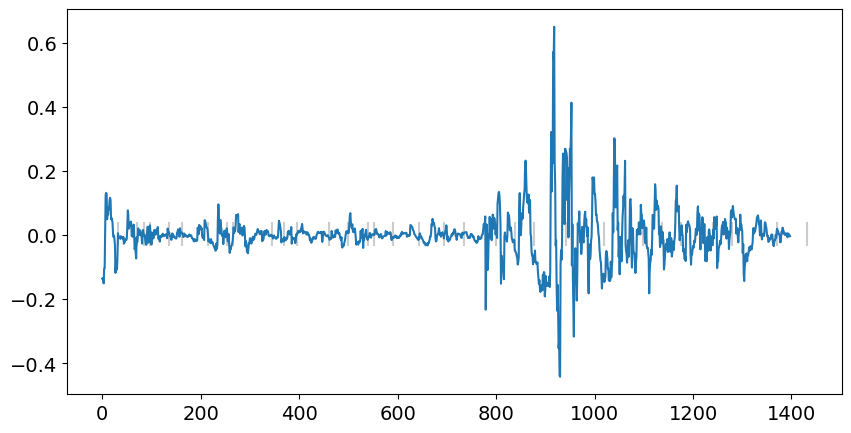

In [78]:
plt.subplots(figsize=(10, 5))
xn = []
all_std = []
all_span = []
for idx, (start, stop, slopes) in enumerate(segments):
    xx = x[start:stop]
    yy = y[start:stop]
    fit = np.polyfit(xx, yy, 1)
    fit_fn = np.poly1d(fit)
    yt = np.array(fit_fn(xx))
    ydt = np.array(yy) - yt
    s = np.std(ydt)
    span = 1000*(np.max(ydt) - np.min(ydt))//np.mean(yy)
    xn.extend(ydt)
    print(f"std: {s:.3f}, rng: {span:.3f}")
    all_std.append(s)
    all_span.append(span)
    
ydt_min, ydt_max = (np.min(ydt), np.max(ydt),)
for start, stop, _ in segments:    
    plt.vlines(stop, ydt_min, ydt_max, "#CCC")
    print()
    
_ = plt.plot(xn)    

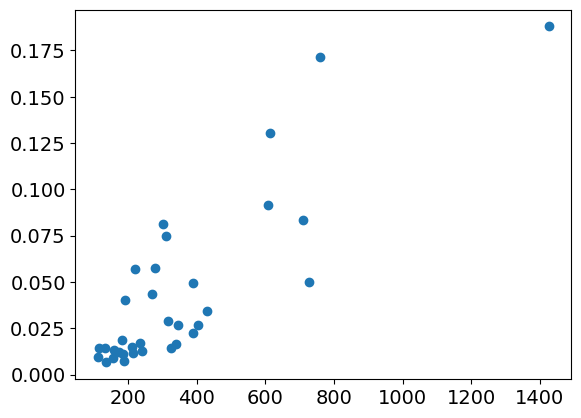

In [79]:
plt.scatter(all_span, all_std)